In [1]:
import zipfile

def extract_zip(zip_filepath, extract_dir):
  with zipfile.ZipFile(zip_filepath, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Example usage
# Replace 'path/to/your/file.zip' with the actual path to your zip file
# Replace 'path/to/extract/directory' with the directory where you want to extract the files
extract_zip('/content/archive (5).zip', '/content')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
email_df = pd.read_csv('/content/spam_ham_dataset.csv')
email_df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
email_df.shape

(5171, 4)

In [5]:
email_df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0
label_num,0


In [6]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


<Axes: ylabel='count'>

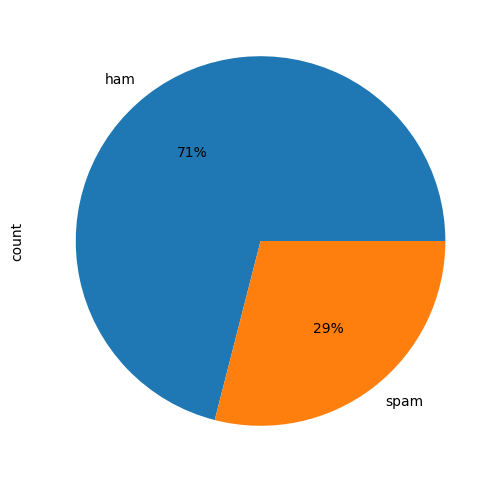

In [11]:
email_df['label'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

In [12]:
email_df['text'][0]

"Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes ."

In [13]:
email_df.head(2)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0


In [15]:
email_df.drop(columns=['label_num','Unnamed: 0'], axis=1, inplace=True)

In [16]:
email_df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [17]:
import re

def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

email_df['text'] = email_df['text'].apply(clean_text)

In [18]:
email_df['text'].apply(lambda x: x.lower())

,text
0,subject enron methanol meter 988291 this is a ...
1,subject hpl nom for january 9 2001 see attache...
2,subject neon retreat ho ho ho we re around to ...
3,subject photoshop windows office cheap main tr...
4,subject re indian springs this deal is to book...
...,...
5166,subject put the 10 on the ft the transport vol...
5167,subject 3 4 2000 and following noms hpl can t ...
5168,subject calpine daily gas nomination julie as ...
5169,subject industrial worksheets for august 2000 ...


In [19]:
email_df['text'][0]

'Subject enron methanol meter 988291 this is a follow up to the note i gave you on monday 4 3 00 preliminary flow data provided by daren please override pop s daily volume presently zero to reflect daily activity you can obtain from gas control this change is needed asap for economics purposes '

In [20]:
email_df.head(2)

,label,text
0,ham,Subject enron methanol meter 988291 this is a ...
1,ham,Subject hpl nom for january 9 2001 see attache...


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
le = LabelEncoder()
email_df['label'] = le.fit_transform(email_df['label'])

tfidf_vec = TfidfVectorizer(max_features=3000)
X = tfidf_vec.fit_transform(email_df['text'])
y = email_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.shape, X_test.shape

((4136, 3000), (1035, 3000))

In [26]:
X_train.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.28787524, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Find the best model
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

print("Model Performance:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

print(f"\nBest Model: {best_model} with accuracy: {best_accuracy:.4f}")


Model Performance:
Logistic Regression: 0.9836
SVM: 0.9865
Naive Bayes: 0.9507
Decision Tree: 0.9469
Random Forest: 0.9826

Best Model: SVM with accuracy: 0.9865


In [29]:
# prompt: save pkl file SVM

import pickle

# Assuming 'models' dictionary from the previous code still exists and contains the trained SVM model
svm_model = models["SVM"]
filename = 'svm_model.pkl'
pickle.dump(svm_model, open(filename, 'wb'))

file_name = "vectorizer.pkl"
pickle.dump(tfidf_vec, open(file_name, "wb"))


In [31]:
# prompt: predict model

import pickle
import re

# Load the saved model and vectorizer
filename = 'svm_model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
file_name = "vectorizer.pkl"
loaded_vectorizer = pickle.load(open(file_name, 'rb'))

def clean_text(text):
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('#\S+', '', text)  # remove hashtags
    text = re.sub('@\S+', '  ', text)  # remove mentions
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7f]',r' ', text)
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text

def predict_spam(text):
  cleaned_text = clean_text(text)
  vectorized_text = loaded_vectorizer.transform([cleaned_text.lower()])
  prediction = loaded_model.predict(vectorized_text)
  return "Spam" if prediction[0] == 1 else "Ham"

# Example usage
text_to_predict = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
prediction = predict_spam(text_to_predict)
print({prediction})


{'Spam'}
